In [27]:
import numpy as np
import IPython
import random
import matplotlib.pyplot as plt
import scipy

In [28]:
def add_random_noise(audio_data: np.array, volume_ratio: float) -> np.array:
    """
    Adds random gaussian noise to audio of length `length` at a random index
    """
    if volume_ratio == 0:
        return audio_data
    data = audio_data.astype(np.float64)
    mean_noise_level = np.mean(np.abs(data))
    print(f'Mean noise level: {mean_noise_level}')
    noise = np.random.normal(0, volume_ratio * mean_noise_level, len(data))
    data += noise
    return data

In [29]:
path = "test.wav"
sample_rate_hz, audio_data = scipy.io.wavfile.read(path)
audio_data = np.mean(audio_data, axis=1) # convert stereo to mono
audio_data = audio_data[:(10 * sample_rate_hz)]
print(sample_rate_hz)

44100


In [30]:
mean_noise_level = np.mean(np.abs(audio_data))
mean_noise_level
mean_noise_level = 20 * np.log10(mean_noise_level)

2656.825596371882

In [31]:
NOISE_LEVELS = [0.0, 0.5, 1.0, 2.5, 5.0, 7.5, 10.0]
distributions = []
for noise_level in NOISE_LEVELS:
    distributions.append(
        np.random.normal(0, noise_level * mean_noise_level, len(audio_data))
    )

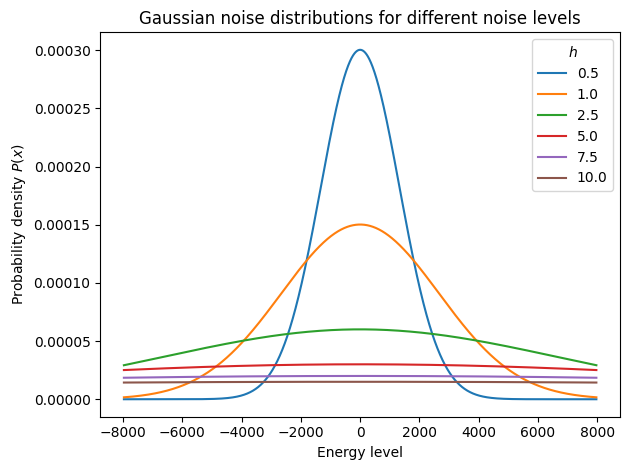

In [35]:
from scipy.stats import norm
x_axis = np.arange(-3*mean_noise_level, 3*mean_noise_level, 1)

for noise_level in NOISE_LEVELS[1:]:
    plt.plot(x_axis, norm.pdf(x_axis,0,noise_level * mean_noise_level), label=f'{noise_level}')
plt.title('Gaussian noise distributions for different noise levels')
plt.xlabel('Energy level')
plt.ylabel('Probability density $P(x)$')
plt.legend(title='$h$')
plt.tight_layout()
plt.savefig('noise_distributions.png')
